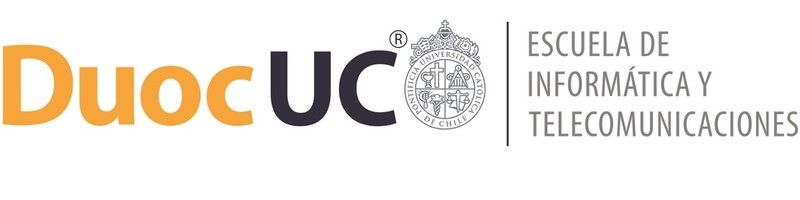

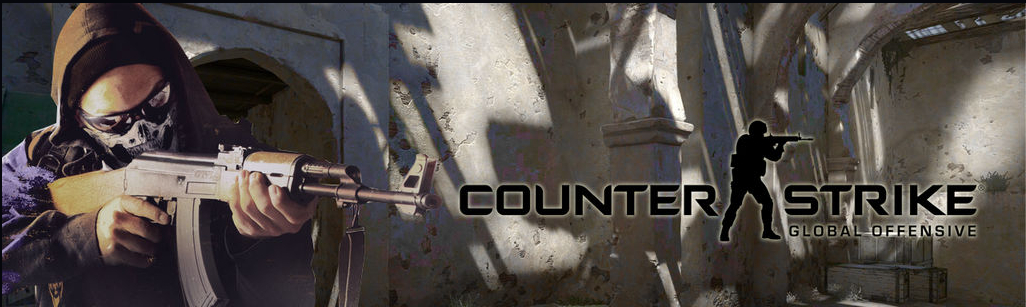

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes: 
* 
* 

Docente:     

Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO 

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan. 
 

El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  

 

En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego. 


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding 

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de 
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos 
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación

In [1]:
#IMPORTS
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#import csv
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces 2.csv to Anexo ET_demo_round_traces 2.csv


<ipython-input-2-d148a7de3b8a>:6: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


In [3]:
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


In [52]:
df.describe()

,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


In [5]:
#Promedio de Headshots por partida
df['MatchHeadshots'].mean()

3.85848377275541

In [48]:
df['MatchHeadshots'].quantile([.25, .5, .75])

0.25    1.0
0.50    3.0
0.75    6.0
Name: MatchHeadshots, dtype: float64

In [7]:
print('Promedio de Kills por partida')
df['MatchKills'].mean()

Promedio de Kills por partida


8.511578255871243

In [49]:
df['MatchKills'].quantile([.25, .5, .75])

0.25     3.0
0.50     8.0
0.75    13.0
Name: MatchKills, dtype: float64

In [10]:
print('Mapa mas jugado en la muestra')
df['Map'].mode()

Mapa mas jugado en la muestra


0    de_inferno
Name: Map, dtype: object

In [19]:
#Estadisticas del equipo
df['TeamStartingEquipmentValue'].describe()

count    79157.000000
mean     18890.133532
std       9743.203024
min          0.000000
25%      10900.000000
50%      22550.000000
75%      26050.000000
max      36150.000000
Name: TeamStartingEquipmentValue, dtype: float64

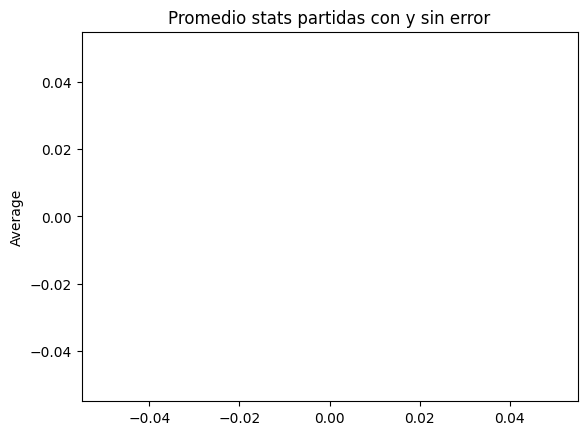

In [63]:
## Comparación de stas entre partidas con y sin error

partidas_con_error = df[df['AbnormalMatch'] == True ]
partidas_sin_error = df[df['AbnormalMatch'] == False ]

kill_error = partidas_con_error['MatchKills'].mean()
kill_no_error = partidas_sin_error['MatchKills'].mean()

assist_error = partidas_con_error['MatchAssists'].mean()
assist_no_error = partidas_sin_error['MatchAssists'].mean()

labels = ['Kill', 'Assists']
con_error = [kill_error, assist_error]
sin_error = [kill_no_error, assist_no_error]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rect1 = ax.bar(x - width/2, con_error, width, label = 'Partida con error')
rect2 = ax.bar(x + width/2, con_error, width, label = 'Partida sin error')

ax.set_ylabel('Average')
ax.set_title('Promedio stats partidas con y sin error')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


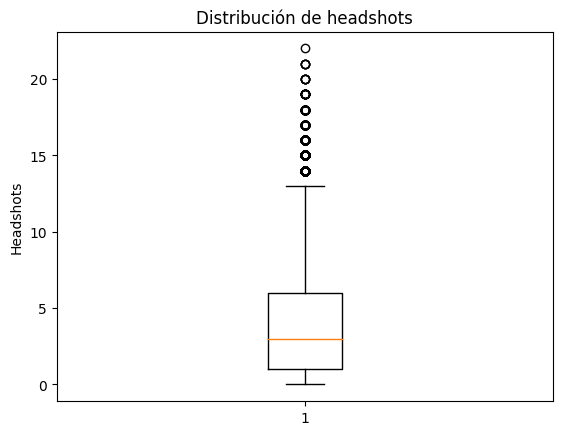

In [32]:
#Distribución de headshots en las partidas
plt.boxplot(df['MatchHeadshots'])
plt.ylabel('Headshots')
plt.title('Distribución de headshots')
plt.show()

## Fase 2: Data Understanding 

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales. 
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

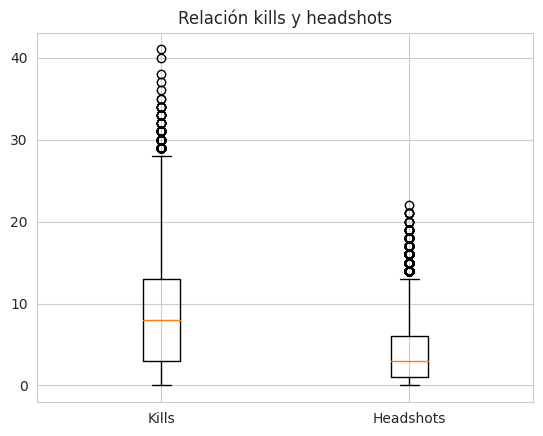

In [73]:
#Diagrama de cajas : Relacion MatchKills y MatchHeadshots

kills = df['MatchKills']
headshots = df['MatchHeadshots']

fig, ax = plt.subplots()
ax.boxplot([kills, headshots])

ax.set_xticklabels(['Kills', 'Headshots'])
ax.set_title('Relación kills y headshots')
plt.show()

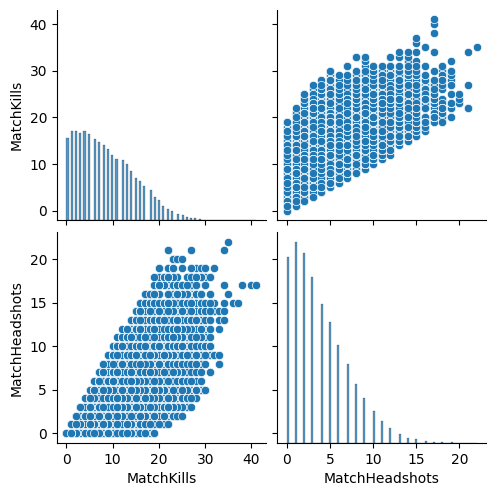

In [35]:
#Gráfico dispersión : Relacion MatchKills y MatchHeadshots
sns.pairplot(df, vars = ['MatchKills', 'MatchHeadshots'])
plt.show()

Con los últimos dos gráficos podemos hacer un estudio interesante.
Si bien el número de headshots a los largo de las partidas es bajo, con este gráfico podemos ver que es un número directamente proporcional al numero de kills. Es decir, a mayor numero de kills en una partida, mayor es la probabilidad de hacer headshots

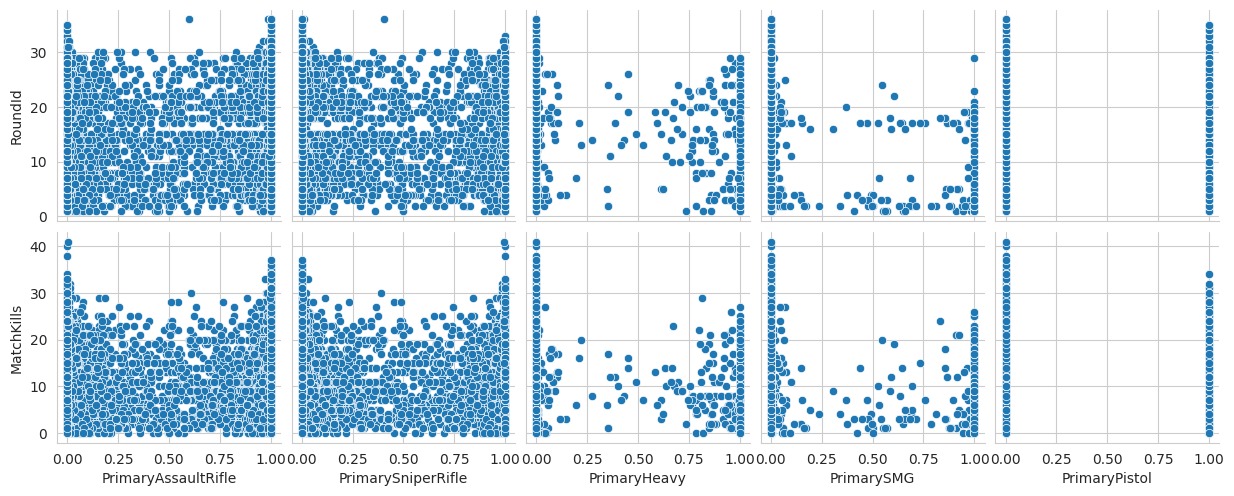

In [75]:
#Gráfico de dispersión : Relación MatchKills y armas utilizadas

par=sns.pairplot(df,
                x_vars=["PrimaryAssaultRifle", "PrimarySniperRifle", "PrimaryHeavy","PrimarySMG","PrimaryPistol"],
                y_vars=["RoundId","MatchKills"],)
plt.show()

Es interesante ver como se sigue el mismo patrón entre el uso de cada arma en cierta ronda con el numero de muertes hechas con dicha arma. Nos da a entender también cuales son las armas favoritas de los jugadores no solo en ciertas rondas, sino que en la mayoría del juego.

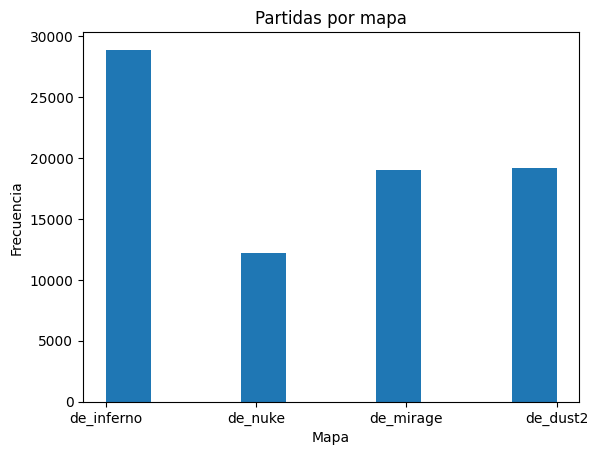

de_inferno    28869
de_dust2      19120
de_mirage     19019
de_nuke       12149
Name: Map, dtype: int64

In [51]:
#Gráfico de barras : Comparación de mapas
plt.hist(df['Map'])
plt.title('Partidas por mapa')
plt.xlabel('Mapa')
plt.ylabel('Frecuencia')
plt.show()
df['Map'].value_counts()

El mapa mas jugado por bastante diferencia es inferno, llegando a ser incluso 2 veces mas jugado que el último mapa nuke

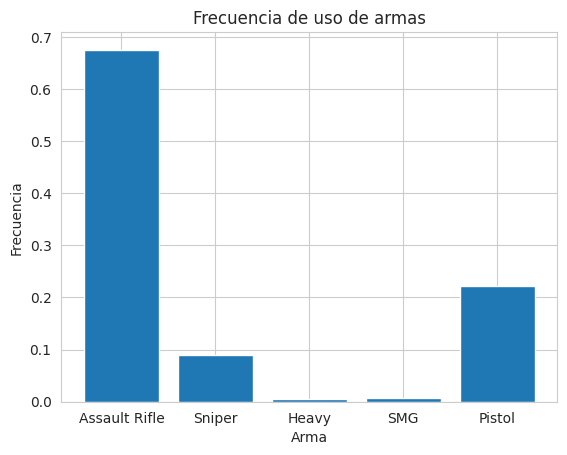

In [71]:
#Gráfico de barras : Arma mas útilizada del juego

assault_rifle = df['PrimaryAssaultRifle'].mean()
sniper_rifle = df['PrimarySniperRifle'].mean()
heavy = df['PrimaryHeavy'].mean()
smg = df['PrimarySMG'].mean()
pistol = df['PrimaryPistol'].mean()

armas = {'Assault Rifle' : assault_rifle, 
         'Sniper' : sniper_rifle, 
         'Heavy' : heavy, 
         'SMG' : smg, 
         'Pistol': pistol}
plt.bar(armas.keys(), armas.values())
plt.title('Frecuencia de uso de armas')
plt.xlabel('Arma')
plt.ylabel('Frecuencia')
plt.show()

El arma más útilizada es el rifle de asalto por mucha diferencia

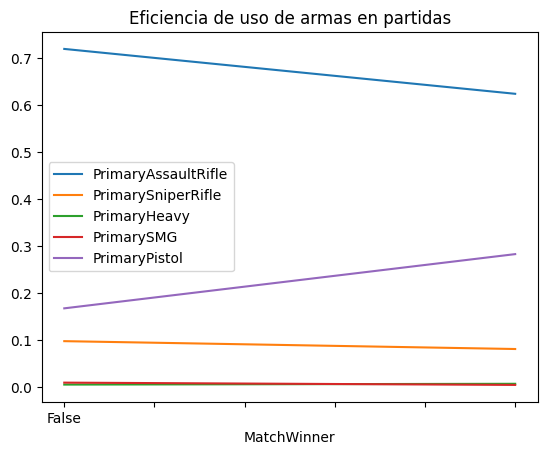

In [44]:
#Eficiencia de armas y efectividad de ellas

armas_primarias = ["PrimaryAssaultRifle", "PrimarySniperRifle", "PrimaryHeavy","PrimarySMG","PrimaryPistol"]
count_primarias = df[armas_primarias].apply(pd.Series.value_counts).sum(axis=1)

eficiencia = df.groupby('MatchWinner')[armas_primarias].mean()

eficiencia.plot()
plt.title('Eficiencia de uso de armas en partidas')
plt.show()

Aquí podemos analizar que si bien el rifle de asalto es el más utilizado del juego, va perdiendo su efectividad con el paso de las partidas, mientras que la pistola, la cual no es un arma muy frecuentada, tiene un crecimiento significativo con el paso de las partidas.

<Axes: xlabel='MatchHeadshots', ylabel='Team'>

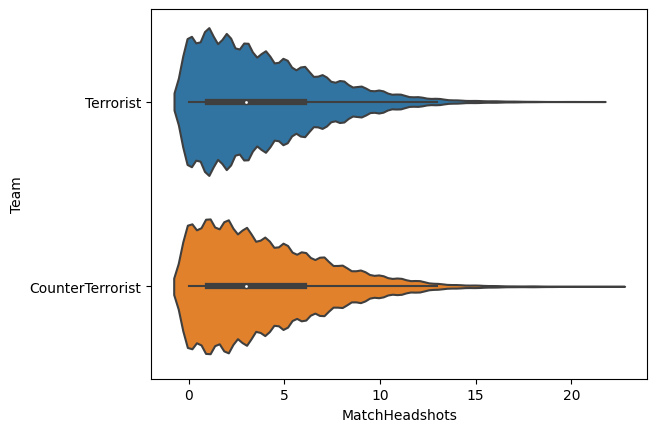

In [45]:
#Comparación entre Headshots por equipo
sns.violinplot(data=df, x="MatchHeadshots", y="Team")

<Axes: xlabel='MatchKills', ylabel='Team'>

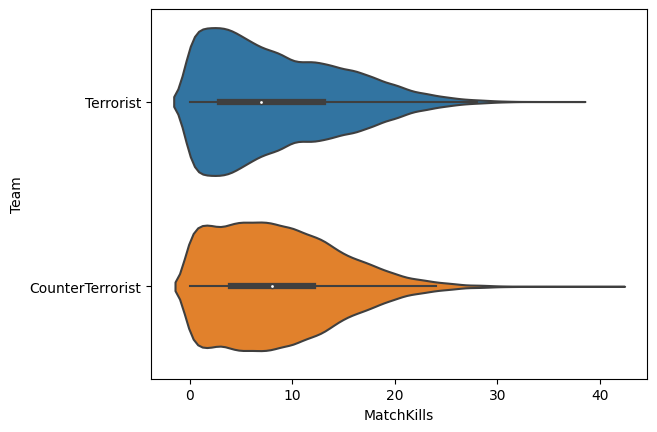

In [46]:
#Comparación entre Kills por equipo
sns.violinplot(data=df, x="MatchKills", y="Team")

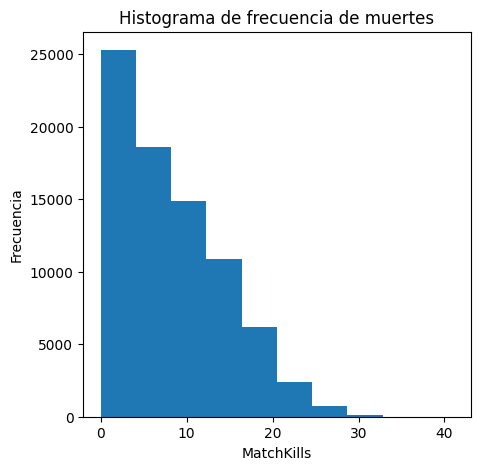

In [55]:
#Cantidad de muertes por partidas
plt.figure(figsize=(5,5))
plt.hist(x = df['MatchKills'], bins = 10)
plt.xlabel("MatchKills")
plt.ylabel("Frecuencia")
plt.title("Histograma de frecuencia de muertes")
plt.show()

Si separamos las muertes por partida en 2 grandes grupos, las que son mas de 20 y las que son menos. Vemos que la gran mayoría hace menos muertes. Nos hace ver la diferencia de habilidades que hay entre los jugadores.

<Axes: xlabel='RoundId', ylabel='MatchKills'>

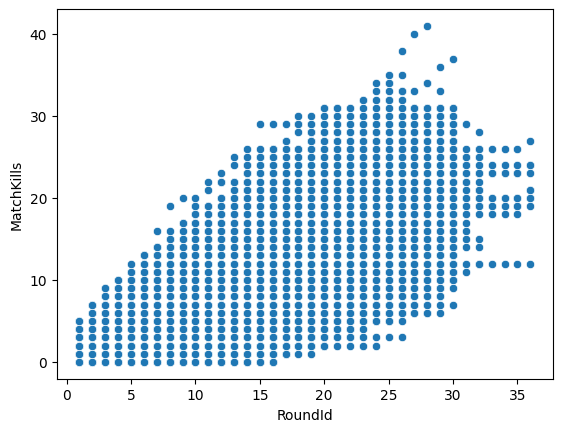

In [65]:
#Relación entre rondas y muertes por partida
sns.scatterplot(data=df, x="RoundId", y="MatchKills")

Podemos notar que el número de muertes es directamente proporcional con el número de rondas jugadas, es decir, mientras mas tiempo pasen jugando más precisos serán sus tiros por lo que resultaran mas muertes.

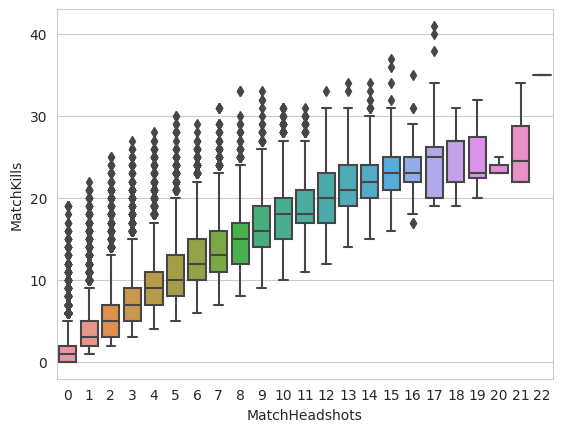

In [67]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="MatchHeadshots",y="MatchKills",data=df)

## Fase 3: Data Preparation 

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.

## Fase 4: Modeling

### Regresión

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar tarea de regresión de datos orientado al caso entregado

### Clasificación



In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar tarea de clasificación de datos orientado al caso entregado

## Fase 5: Evaluation

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Evaluar con las métricas que corresponda los mejores modelos, explicar cual es mejor para cada tarea y por qué

## Fase 5: Deployment

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar despliegue del modelo